In [1]:
# setup notebook
# notebook formatting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# enable split cells in notebook
# if not installed:  pip install jupyter_contrib_nbextensions; then repeat this cmd
!jupyter nbextension enable splitcell/splitcell  

# fix RISE scollbar missing
# if RISE scroll not working fix path to match your jupyter nbconfig, uncomment below and run
# from traitlets.config.manager import BaseJSONConfigManager
# path = "~\user\.jupyter\nbconfig"
# cm = BaseJSONConfigManager(config_dir=path)

# cm.update("livereveal", {
#              "scroll": True,
# });

# imports
import os
import random

# math
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

# visualization - imports and setting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

Enabling notebook extension splitcell/splitcell...
      - Validating: ok


In [2]:
%%html
<style>
style="vertical-align: text-top";
table {float:left}
</style>

# Effective Visualizations
<br>
<img src="./images/minard.napoleon_russia_1812.png" width=500 alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" style="float:right; width:80%"/>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


### About Me...
* Chris Brousseau
* @surfaceowl
* chris@surfaceowl.com


### What I do...
* Founder: Surface Owl
* Data Scientist
* Python Development
* PyBay Diversity & Inclusion Chair


# Agenda - Visualizations & Python<br>

1- Understand why effective visualizations are important

2- Think about good approachs to visuals

3- Learn about the python visualization universe

4- Foundation - matplotlib

5- Future - bokeh


# 1- Understand why effective visualizations are important


# Why Visualizations?
- <b>to accomplish a goal</b><br>
   - share information 
   - create understanding
   - convice someone to take action<br><br>

- Efficient compression of data<br><br>

- Most sighted people naturally have powerful visual perception abilities



# Why visualization is important:  *Create Understanding*<br>
# Charles Minard's Map of the March to Moscow

<img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" />



Supporting Data:

Temperature data in:
°re:  [-26.0, -30.0, -24.0, -20.0, -11.0, -21.0, -9.0, 0.0]
°c:   [-32.0, -38.0, -30.0, -25.0, -14.0, -26.0, -11.0, 0.0]
°f:   [-26.0, -36.0, -22.0, -13.0, 7.0, -15.0, 12.0, 32.0] 

Total # of days marching back from Moscow:  44


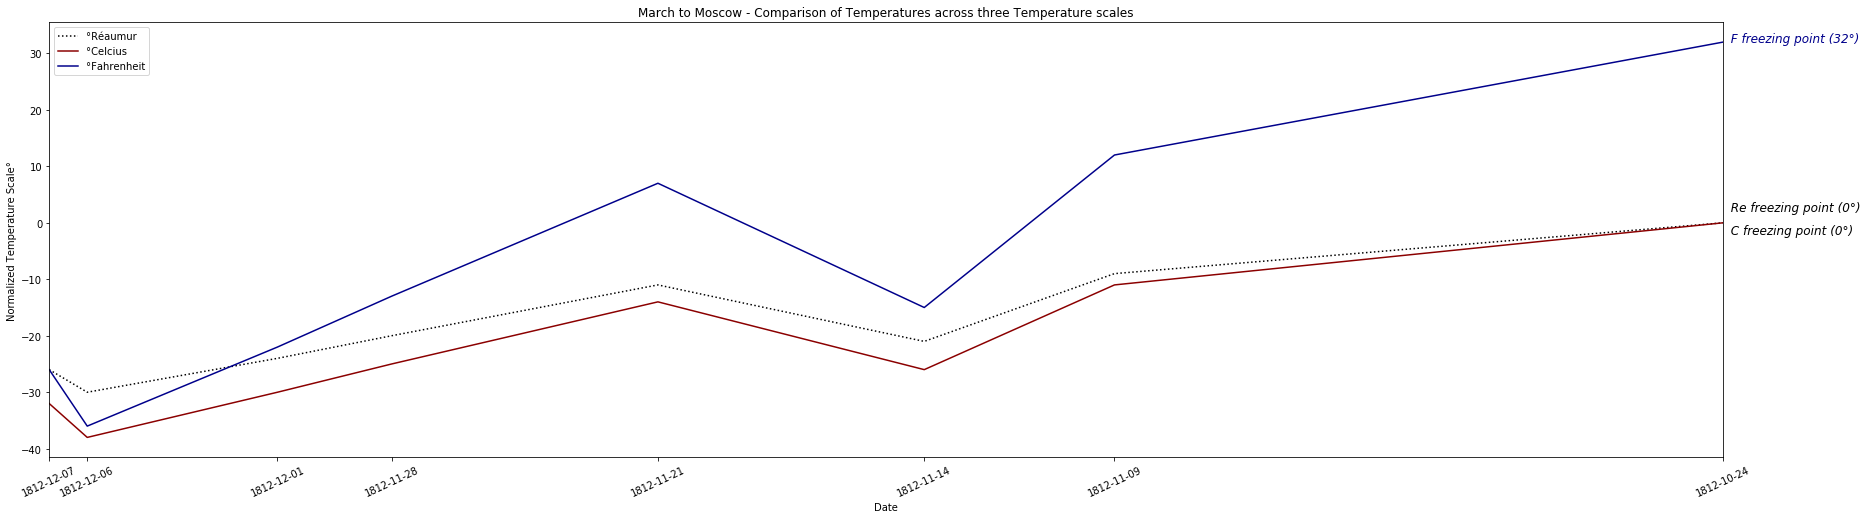

In [3]:
# Minard's chart uses a different temperature scaled called the Réaumur scale
# water freeze @ 0°, boils at 80°
# https://en.wikipedia.org/wiki/R%C3%A9aumur_scale
# what are these temperatures in scales we are more familiar with (°F, °C)?
import datetime as dt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# get data for chart, format dates for matplotlib; 
# data source:  https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/minard.txt
dates = ['12/7/1812', '12/6/1812', '12/1/1812', '11/28/1812', '11/21/1812', '11/14/1812', '11/9/1812', '10/24/1812']
dates = [dt.datetime.strptime(date,'%m/%d/%Y').date() for date in dates]
total_days_from_moscow = (dates[0] - dates[-1]).days  # total # of days on chart


# temp data - temps in °Re
temps_re = [-26.0, -30.0, -24.0, -20.0, -11.0, -21.0, -9.0, 0.0]

# conversion to Celcius and Fahrenheit
def re_to_c(temp_re):
    return round(temp_re * (5/4), 0)

def re_to_f(temp_re):
    return round((temp_re * 9/4) + 32, 0)

temps_c = [re_to_c(temp) for temp in temps_re]
temps_f = [re_to_f(temp) for temp in temps_re]

print("\n\nSupporting Data:\n\nTemperature data in:")
print("°re: ", temps_re)
print("°c:  ", temps_c)
print("°f:  ", temps_f, "\n")
print("Total # of days marching back from Moscow: ", total_days_from_moscow)

# setup chart
plt.figure(figsize=(30,8));
plt.xlim(dates[0], dates[-1])  # reverse x axis to matches Minard's chart
plt.xticks(dates, dates, rotation=25)
plt.title("March to Moscow - Comparison of Temperatures across three Temperature scales")
plt.xlabel("Date")
plt.ylabel("Normalized Temperature Scale°")
plt.plot(dates, temps_re, color="black", linestyle="dotted")
plt.plot(dates, temps_c, color="darkred")
plt.plot(dates, temps_f,color="darkblue")
plt.text(dates[-1], 2, "  Re freezing point (0°)", fontsize=12, fontstyle="italic", color="black")
plt.text(dates[-1], -2, "  C freezing point (0°)", fontsize=12, fontstyle="italic", color="black")
plt.text(dates[-1], 32, "  F freezing point (32°)", fontsize=12, fontstyle="italic", color="darkblue")
plt.legend(("°Réaumur", "°Celcius", "°Fahrenheit"))
plt.show();


In [7]:
%%html
<!DOCTYPE html>
<html>
<head>
<style>
img.challenger {
  height: auto%;
  width: 90%;
}
</style>

<p style="font-weight:bold; font-size:185%;">Why is visualization important?  <i>Convince people to Take Action</i></p><br>

</head>
<body>

<table> <tr> <th style="width:50%"></th> <th></th> </tr> 
    <tr> 
        <td><a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img class="challenger" src="./images/challenger.photo.1110px-Challenger_explosion.jpg" alt="Space Shuttle Challenger Disaster - 28 Jan 1986" title="Space Shuttle Challenger Disaster"/></a></td>
        <td style="vertical-align:top; text-align:left; font-size: 160%"> <strong>
            <b>Challenger Disaster - 28 Jan 1986</b><br><br>
            - All seven crew members died<br><br> 
            - five NASA astronauts, one payload specialist, and a civilian school teacher<br><br>
            - caused by the failure of O-ring seals in right solid rocket booster<br><br>
            - NASA disregarded engineers NO-LAUNCH warnings<br><br><br>  
            - <i>...but the warnings were confusing</i><br><br></strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr >
            <td>
            </td>
        <td style="text-align:left; font-size: 120%"> 
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><strong>link: challenger disaster - wikipedia</strong></a></td>
        <td> 
    </tr >
    <tr>
            <td>
            </td>
            <td style="text-align:left; font-size: 120%"> 
            <a href="https://forum.nasaspaceflight.com/index.php?PHPSESSID=n2pbop2fh60010n76lmcnh4po7&action=dlattach;topic=8535.0;attach=25186"><strong>link: Rogers Commission Report</strong></a>
        </td>

    </tr>
    <tr>
        <td>
        </td>
        <td style="text-align:left; font-size: 120%"> <br>
            <a href="https://en.wikipedia.org/wiki/Rogers_Commission_Report"><strong>link: tldr - wikipedia page on Rogers Commission Report</strong></a>
        </td>
    </tr>
        <tr>
            <td>
            </td>
            <td style="text-align:left; font-size: 120%">
                <a href="https://www.vice.com/en_us/article/kbb3qz/could-better-data-design-have-prevented-challenger"><strong>link: presentation obscured lack of data</strong></a><br><br><strong>[credit: Wikipedia](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)</strong>
            </td>
        </tr>
</table>
</body>
</html>


,
,"Challenger Disaster - 28 Jan 1986 - All seven crew members died - five NASA astronauts, one payload specialist, and a civilian school teacher - caused by the failure of O-ring seals in right solid rocket booster - NASA disregarded engineers NO-LAUNCH warnings - ...but the warnings were confusing"
,
,link: challenger disaster - wikipedia
,link: Rogers Commission Report
,link: tldr - wikipedia page on Rogers Commission Report
,link: presentation obscured lack of data[credit: Wikipedia](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)


# Background:  What happened?<br>

<table style="width:100%"> 
    <tr> 
        <th style="width:50%"></th> <th></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:left; font-size: 250%">
            - Problem was with a booster rocket <br><br><br>
            - Rockets built in sections <br><br><br>
            - O-rings<br>
            1- Sealed joints on booster<br>
            2- NOT designed for cold temps ==> NOT flexible <br>
            3- Did not stop flames <br>
            4- Flames hit the liquid hydrogen fuel tank<br><br>
            - Org culture + decision-making processes were key factors to the accident<br><br><br><br>
            - <a href="https://upload.wikimedia.org/wikipedia/commons/4/4f/ChallengerSimple.png"><strong>link: step-by-step graphic</strong></a><br><br><br>
        </td>
        <td>
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><img src="./images/challenger_launch_plume_wikimedia.jpg" alt="Plume from Booster" title="Plume from Booster" /></a>
        </td>
    </tr>
    <td></td>
</table>


<strong>[credit: Wikipedia](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)</strong>

# Why were the warnings confusing?


## [...because of 13 pages of data like this...](https://history.nasa.gov/rogersrep/v4part6.htm#1)

<table> 
    <tr> 
        <th></th> 
        <th></th> 
        <th></th> 
    </tr> 
    <tr> 
        <td><img src="./images/challenger_main_no_launch_chart_srm_field_joints.jpg" alt="Challenger - Engineer Warning -SRM Field Joints" title="No Launch - SRM Field Joints" /></td>
        <td><img src="./images/challenger_main_no_launch_chart.booster_damage.v5p896.jpg" alt="Challenger - Engineer Warning - History of O-Ring Damage" title="History of O-Ring Damages" /></td>
        <td><img src="./images/challenger_main_no_launch_oring_temp_vs_damage.jpg" alt="Challenger - Engineer Warning - O-Ring Damage vs Temp" title="O-Ring Damage vs Temp" /></td>
        <th></th> 
    </tr>
</table><br>

- [credit: Rogers Commission Report; NASA original source](https://history.nasa.gov/rogersrep/v4part6.htm#1)

# These 13 pages...

### - Defined the framework for the launch/no-launch decision


### - Omitted data from 22 launches


### - Obscured a crucial lack of data


### - Were just not compelling to decision makers<br>


# ...There must be a better way<br>

[Edward Tufte - main site](https://www.edwardtufte.com/tufte/)<br><br>
[Visual Explanations - Edward Tufte](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/1930824157)



### - Distills Challenger data from Roberts Report and makes a compelling visualization


### - Let's replicate that in pandas & matplotlib


In [8]:
import pandas as pd
df = pd.read_csv("./images/challenger_o-ring_damage_data.csv", encoding="ISO-8859–1")

df["Date"] =  pd.to_datetime(df["Date"].str.replace("."," "))
# df["Date"] =  pd.to_datetime(df["Date"], format='%d.%m.%y')

df[["Erosion incidents", "Blow-by incidents"]] = df[["Erosion incidents", "Blow-by incidents"]].fillna(axis=1, value=0)
df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]] = df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]].apply(pd.to_numeric).astype('int')

df[["Flight", "Comments"]] = df[["Flight", "Comments"]].astype('category')
df["Comments"] = df["Comments"].cat.add_categories("no comment listed")
df[["Comments"]] = df[["Comments"]].fillna("no comment listed")

# sort temperature values to use as X axis, so we can plot results
df = df.sort_values("Temperature °F")
df.head(10) 

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


In [9]:
# what is the relationship between temperature and damage data?
model = LinearRegression()

# reshape our data since there is only one feature
# X = df.loc[:, "Temperature °F"].values.reshape(-1, 1) # get values & convert to a numpy array has failed intermittently, while iloc works consistently
# Y = df.loc[:, "Damage index"].values.reshape(-1, 1)  # get values and convert into 1 column numpy array
X = df.iloc[:, 2].values.reshape(-1, 1)  # another way to do this using iloc
Y = df.iloc[:, 5].values.reshape(-1, 1)  # ibid

# run regression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

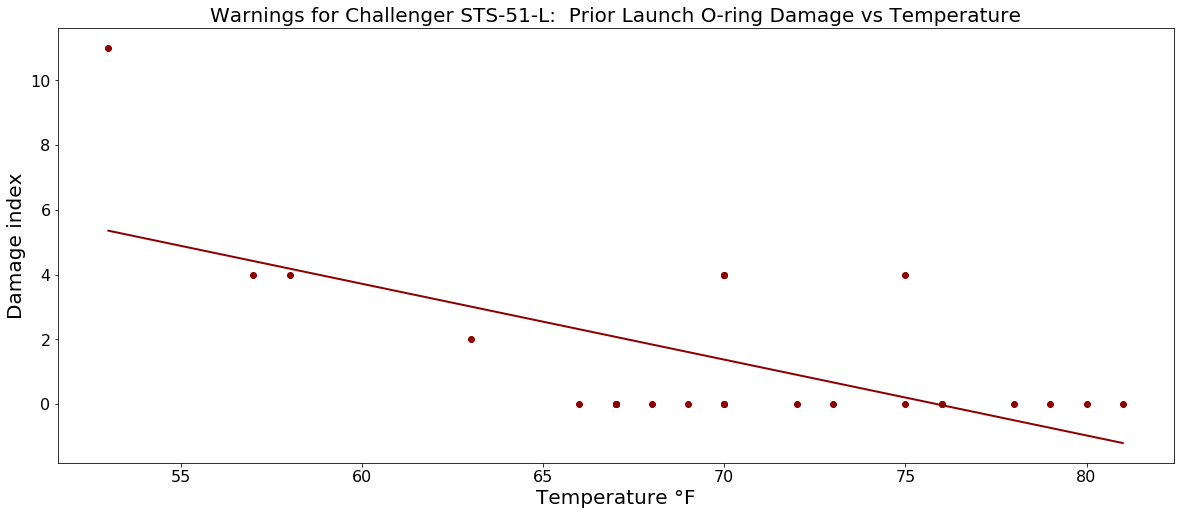

In [10]:
# plot the NASA data

plt.figure(figsize=(20,8))
plt.scatter(X, Y, color="darkred")
plt.plot(X, Y_pred, color="darkred", linewidth=2)
plt.title("Warnings for Challenger STS-51-L:  Prior Launch O-ring Damage vs Temperature", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Temperature °F", fontsize=20)
plt.ylabel("Damage index", fontsize=20);


In [11]:
# predict damage for temperature at time of launch
challenger_launch_temp = 36

# generate array of lower temps -- below temps of previous launches
Z = [x for x in range(30, 53)]
Z = np.asarray(Z).reshape(-1, 1)
Z_pred = linear_regressor.predict(Z)  # make predictions

# helpful historic datapoints
prior_launch_temp_min = df.iloc[:, 2].min().round(1)
prior_damage_avg = df.loc[:, "Damage index"].mean().round(1)  # using historic data
challenger_launch_temp_np = np.asarray(challenger_launch_temp).reshape(-1, 1)
challenger_damage_predicted = round(linear_regressor.predict(challenger_launch_temp_np)[0][0],1)


In [12]:
# create plot; use functions so we can build up graph step by step

def plot_history():
    plt.figure(figsize=(30,8))
    plt.title("Predicted Challenger O-ring Damage as a Function of Temperature", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel("Temperature °F", fontsize=20)
    plt.ylabel("Damage index", fontsize=20)
    plt.xlim(30, 85)
    plt.ylim(-0.5, 11)
    plt.scatter(X, Y, color="darkred")
    plt.plot(X, Y_pred, color='darkred', linewidth=2)
    
    return True


def plot_key_temps():
    # highlight key temperatures
    plt.axvline(53, color="green", linestyle=":", linewidth=2)
    plt.text(prior_launch_temp_min + 0.5, 0.05, f"Lowest prior temp {prior_launch_temp_min} ", fontsize=10)
    plt.axvline(36, color="grey", linestyle=":")
    plt.text(challenger_launch_temp + 0.5, 0.05, f"Challenger prior temp {challenger_launch_temp} ", fontsize=10)
 
    return True


def plot_predicted_damage():
    plt.plot(Z, Z_pred, color='orange', linestyle="--", linewidth=2)
    
    return True


def plot_annotations():
    plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
    plt.axhline(challenger_damage_predicted, color="orange", linestyle="--", linewidth=2)

    # add some labels to hammer it home
    plt.text(36, 1, f"AVERAGE Damage(prior launches)= {prior_damage_avg} ", fontsize=14)
    plt.text(36, 9.5, f"PREDICTED Damage at 36°F= {challenger_damage_predicted} ", fontsize=14, fontweight="bold")
   
    return True 



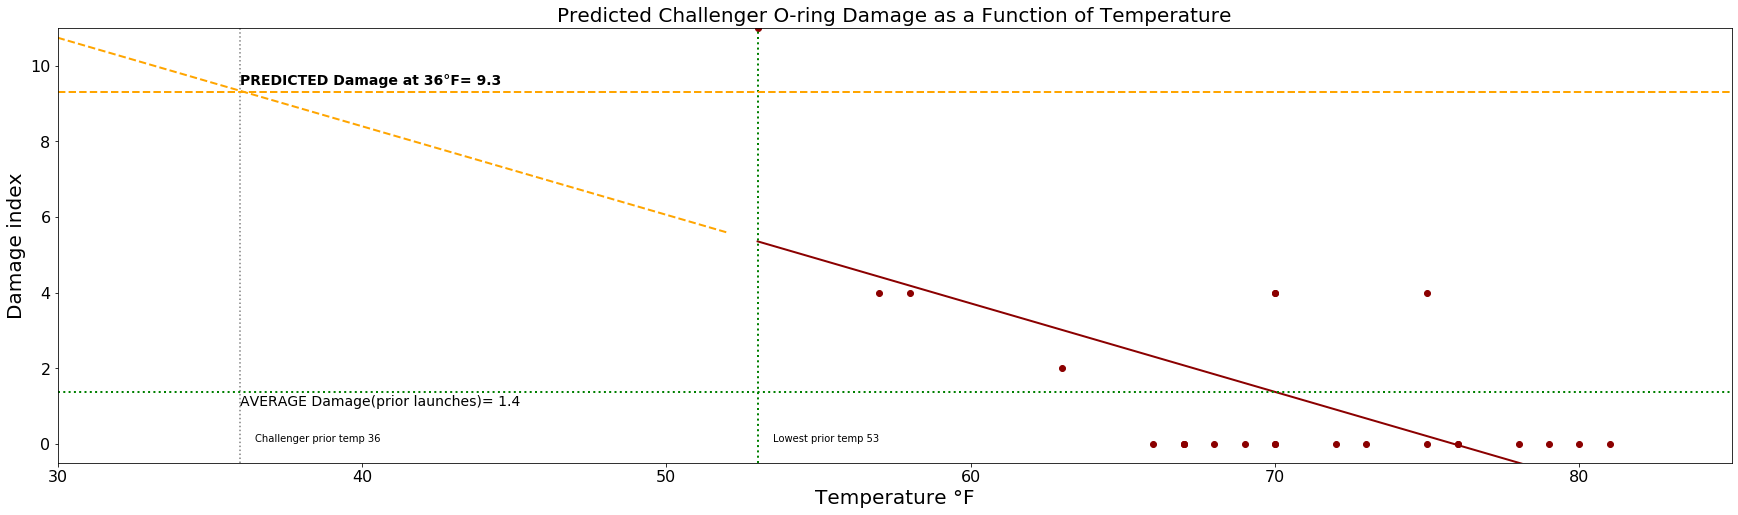

In [16]:
# show the plot
# uncomment lines below through discussion
plot_history()
plot_key_temps()
plot_predicted_damage()
plot_annotations()

plt.show();


In [ ]:
# reference slide:  same slide as previous - with everything in one shot
# create plot; use functions so we can build up graph step by step

def plot_history():
    plt.figure(figsize=(30,8))
    plt.title("Predicted Challenger O-ring Damage as a Function of Temperature", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlabel("Temperature °F", fontsize=20)
    plt.ylabel("Damage index", fontsize=20)
    plt.xlim(30, 85)
    plt.ylim(-0.5, 11)
    plt.scatter(X, Y, color="darkred")
    plt.plot(X, Y_pred, color='darkred', linewidth=2)
    
    return True


def plot_key_temps():
    # highlight key temperatures
    plt.axvline(53, color="green", linestyle=":", linewidth=2)
    plt.text(prior_launch_temp_min + 0.5, 0.05, f"Lowest prior temp {prior_launch_temp_min} ", fontsize=10)
    plt.axvline(36, color="grey", linestyle=":")
    plt.text(challenger_launch_temp + 0.5, 0.05, f"Challenger prior temp {challenger_launch_temp} ", fontsize=10)
 
    return True


def plot_predicted_damage():
    plt.plot(Z, Z_pred, color='orange', linestyle="--", linewidth=2)
    
    return True


def plot_annotations():
    plt.axhline(df.loc[:, "Damage index"].mean(), color="green", linestyle="dotted", linewidth=2)
    plt.axhline(challenger_damage_predicted, color="orange", linestyle="--", linewidth=2)

    # add some labels to hammer it home
    plt.text(36, 1, f"AVERAGE Damage(prior launches)= {prior_damage_avg} ", fontsize=14)
    plt.text(36, 9.5, f"PREDICTED Damage at 36°F= {challenger_damage_predicted} ", fontsize=14, fontweight="bold")
   
    return True

plot_history()
plot_key_temps()
plot_predicted_damage()
plot_annotations()

plt.show();

# Why is visualization important?   *Numbers don't always show important facts* <br>

## Anscome's Quartet:

In [17]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

print("Mean of each dataset in df")
display(df.groupby(["dataset"]).mean())
print("\n\nCovariance - measures how changes are associated between variables")
display(df.groupby(["dataset"]).cov().round(1))

print("\n\nPearson's Correlation Coeffient - measures linear correlation")
display(df.groupby(["dataset"]).corr(method="pearson"))


Mean of each dataset in df


,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909




Covariance - measures how changes are associated between variables


x    y
dataset             
I       x  11.0  5.5
        y   5.5  4.1
II      x  11.0  5.5
        y   5.5  4.1
III     x  11.0  5.5
        y   5.5  4.1
IV      x  11.0  5.5
        y   5.5  4.1



Pearson's Correlation Coeffient - measures linear correlation


x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000


Credit:  https://seaborn.pydata.org/examples/anscombes_quartet.html


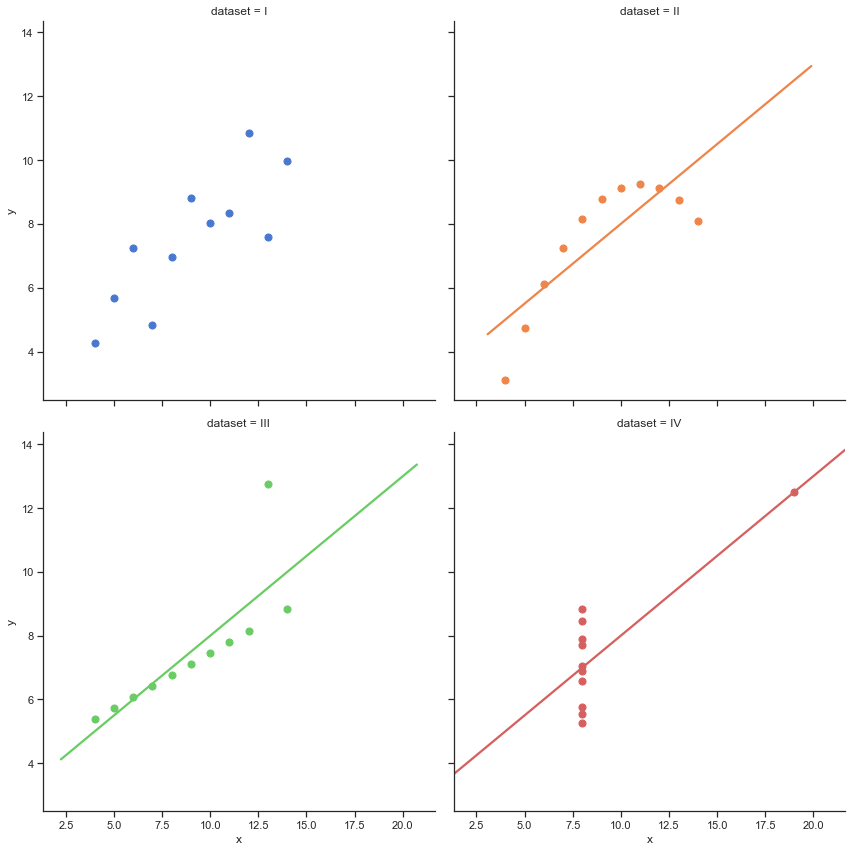

In [18]:
# plot these datasets
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=6,
           scatter_kws={"s": 50, "alpha": 1})

print("\nCredit:  https://seaborn.pydata.org/examples/anscombes_quartet.html")


<img src="./images/anscombe's_quartet_3.svg_wikipedia.png" width=60% /><br>
<strong><italic>credit: Wikipedia<strong><italic><br>
<strong>[Pure witchcraft from:  Alberto Cairo's Datasaurus](https://www.autodeskresearch.com/publications/samestats)</strong><br><br>
<strong>[Python/Seaborm page to generate and plot your own](https://seaborn.pydata.org/examples/anscombes_quartet.html)<br>

# 2- Think about the right visual approach

## Grammar of Graphics

- Construct graphics in a layered approach<br>
- From Leland Wilkinson's book of the same name<br>
- Drove creation of ggplot (R) and plotnine (python)<br><br>
<img src="./images/grammar_graphics_pyramid_1 mcLnnVdHNg-ikDbHJfHDNA.png" width=70% />

<strong>- resources to check out:</strong><br>
https://towardsdatascience.com/murdering-a-legendary-data-story-what-can-we-learn-from-a-grammar-of-graphics-ad6ca42f5e30<br>
https://www.slideshare.net/kesarifms/grammar-of-graphics-the-secret-sauce-of-powerful-data-stories<br>

<strong>[credit: Leland Wilkinson, Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)</strong>

# How I might think about creating visualiztions

## Big Questions

- what data do I have?<br>
- what is my goal?<br>
- who is my audience?<br>

## 2nd Order questions:<br>
- keep it simple (less is more)<br>
- choose the right chart structure<br>
- show all the data
- organize / sort data
- accurate scaling
- use predictable patterns<br>
- use color carefully -> implies value<br>
- use text carefully & intentionally<br>
- interactive or static<br>

# Find the graphic you need = objective + data you have
<a href="https://www.data-to-viz.com/" target="_blank"> <img src="./images/data_to_vis_screencap.png" title="Data to Vis Website" alt="Data to Vis Website"/></a><br><br>
[credit: Data-to-Viz site - free, interactive tool](https://www.data-to-viz.com/)

# Visualization - Leaders to Follow (unordered & incomplete list!)

<strong>Theory & Design</strong><br>
[Edward Tufte](https://www.edwardtufte.com/tufte/?gclid=EAIaIQobChMIvIul89f55QIVMhh9Ch3Tmwg3EAAYASAAEgKoAfD_BwE)<br>
[Alberto Cairo](http://albertocairo.com/)<br>
[David McAndless / Information is Beautiful](https://en.wikipedia.org/wiki/David_McCandless)<br>
<br>
<strong>D3</strong><br>
[Mike Bostock - D3](https://bost.ocks.org/mike/)<br>
[Nadieh Bremer](https://www.visualcinnamon.com/)<br>
[Shirley Wu](https://sxywu.com/)<br>
[Elijah Meeks](https://medium.com/@Elijah_Meeks)<br>
[D3](https://d3js.org/)<br>
<br>
<strong>Publications</strong><br>
[Economist](https://www.economist.com/)<br>
[Information is Beautiful](https://informationisbeautiful.net/)<br>
[New York Times](https://www.nytimes.com/)<br>
[The Guardian](https://www.theguardian.com/technology/data-visualisation)<br>
<br>
<strong>Apps</strong><br>
[what makes a good visualization?  source: information is beautiful](https://informationisbeautiful.net/visualizations/what-makes-a-good-data-visualization/)<br>
[Observable - notebooks for data viz](https://observablehq.com/)<br>
[bl.ocks.org/](https://bl.ocks.org/)<br>
[Visualization Universe](http://visualizationuniverse.com/)<br>
<br>

# 3- Get a snapshot of the python visualization universe

- [PyVis landscape overview](https://pyviz.org/overviews/index.html)<br><br>
- [PyCon 2017 - Pythons Visualization Landscape by Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017)<br><br>
- [credit- graphic on following page: Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017)

In [19]:
# Focus of this talk
from itertools import cycle
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

# create list of images to rotate through
image_set = ["./images/pyvis_landscape_overview_2019_landscape-talk_highlights.png", "./images/pyvis_landscape_overview_2019_landscape-colors.png"]
images = [widgets.Image(value=open(name, "rb").read()) for name in image_set]
imagecycle = cycle(images)  # iterator of images

button = widgets.Button(description="Swap Image");
output = widgets.Output();
credit = "credit: Jake VanderPlas"
display(credit, button, widgets.Image(value=open("./images/pyvis_landscape_overview_2019_landscape-colors.png", "rb").read()))

def on_button_clicked(b):
    display(clear_output(wait=True), credit, button, next(imagecycle))

button.on_click(on_button_clicked)



None

'credit: Jake VanderPlas'

Button(description='Swap Image', style=ButtonStyle())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0b\xe8\x00\x00\x05\xc5\x08\x06\x00\x00\x00/\x82\x16…

# Community Question - "can you also touch on plotly and dash with pros/cons?"


[Anaconda Articla:  "Datavis - why so many libraries"](https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/)<br>

<table>
    <tr style="vertical-align: top">
        <th style="vertical-align:top; text-align:right; font-size: 150%" width="300px"> <i></i></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="300px"><b>Matplotlib</b></th>
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="300px"><b>Bokeh</b></th> 
        <th style="vertical-align:top; text-align:left; font-size: 150%" width="300px"><b>Plotly</b></th> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>release year</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2003</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">2013</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>framework - front end</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">mpld3</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Javascript</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>backend</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">many renderers<br></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Tornado<br></td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Flask<br></td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Supporting Libraries</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Seaborn</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Batteries Included</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Plotly<br>Express<br>Cufflinks</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Dashboard Framework</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Panel</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">Dash</td> 
    </tr>
    <tr>
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Corporate Sponsor</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">None</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">Anaconda</td> 
        <td style="tvertical-align:top; text-align:left; font-size: 150%">Plotly - the company</td> 
    </tr>
    <tr style="vertical-align: top">
        <td style="vertical-align:top; text-align:right; font-size: 150%"><i>Maybe you didn't know</i></td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">- Oldest visualization library</td>
        <td style="vertical-align:top; text-align:left; font-size: 150%">- Interactive<br>- Intelligent Errors (...similar...)<br>- Great docs</td> 
        <td style="vertical-align:top; text-align:left; font-size: 150%">- Interactive<br>- <strong>Used to </strong>require plotly account<br>- Has supporting gui (Chart Studio)</td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Pandas</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><i>Jupyter Notebook & JupyterLab</i></td>
        <td style="text-align:left; font-size: 150%">Yes</td>
        <td style="text-align:left; font-size: 150%">Yes</td> 
        <td style="text-align:left; font-size: 150%">Yes</td> 
    </tr>
    <tr>
        <td style="text-align:right; font-size: 150%"><strong><i>Awesome library you should try</i></strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td>
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
        <td style="text-align:left; font-size: 150%"><strong>Yes</strong></td> 
    </tr>
</table>


# Quiz - Tufte

# What have we learned so far?

0 - Sighted people have powerful visual perception abilities

1- Images effectively distill info

2- Images give insights pure numbers do not

3- Visualizations can be complex - but there are tools to help

4- Python has a lot of visualization libraries


# [link to our next chapter - matplotlib](http://localhost:8888/notebooks/notebooks/01_matplotlib_chapter.ipynb)